<h1>Business Understanding</h1>
<h2>The CIFAR-10 Dataset</h2>
<h3>Overview</h3>
<p>
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 
</p>

<p>
    <ul>
        <li>Airplane</li>
        <li>Automobile</li>
        <li>Bird</li>
        <li>Cat</li>
        <li>Deer</li>
        <li>Dog</li>
        <li>Frog</li>
        <li>Horse</li>
        <li>Ship</li>
        <li>Truck</li>
    </ul>
</p>

<p>The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.</p>

<h3>Purpose of the Dataset</h3>
<p>To train machine learning and computer vision algorithms, as these algorithms learn to recognize objects in images by example.</p>
<h3>Why was the data collected in the first place?</h3>
<p>The data was collected by the Canadian Institute for Advanced Research (CIFAR). It is a labeled subset of the 80 million tiny images dataset. Students were paid to label those images. This dataset was built primarily for machine learning reasearch.</p>
<h3>Prediction Task</h3>
<p>The task is to be able to accurately classify the images by labels. There are 10 classes and labels in this dataset. As this dataset was primarily built for machine learning research, educational institutions and researchers would be most interested in this dataset to train and test their algorithms. The importance of this dataset lies in its versatility and simplicity; it is a clean dataset with a clear prediction task that can be used to train algorithms.</p>

<h3>Business Case: Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to the identified third parties</h3>
<p>A cloud image service like imgur could utilize an image classifer to classify every image that gets uploaded to their servers. Image classification could be important to exclude certain images from getting uploaded, as manually surfing through all uploaded images is inefficient and impractical. So it would function as a filter. It could also serve to classify the content of those images and assign a label for each. While this is a relatively small subset of images (3000) with a small number of classes (10), it would serve to test the performance of different prediction algorithms. Having said that, the prediction algorithm would need to be very accurate to be useful for those uses. A margin of 95% accuracy is arbitrarily selected in this case. Identifying a car as a frog is unacceptable, as an example.</p>

<h1>Data Preparation</h1>

<h2>Reading in The Images</h2>

In [1]:
# Loading (unpickling) the data for later processing
import numpy as np
import pickle

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dicts = pickle.load(fo, encoding='bytes')
        images = dicts[b'data']
        labels = dicts[b'labels']
        imageArray = np.array(images)
        labelArray = np.array(labels).reshape((10000, 1))
    return imageArray, labelArray

In [2]:
# These are the data and class variables (targets)
first_batch_images, first_batch_labels = unpickle('cifar-10-batches-py\data_batch_1')
second_batch_images, second_batch_labels = unpickle('cifar-10-batches-py\data_batch_2')
third_batch_images, third_batch_labels = unpickle('cifar-10-batches-py\data_batch_3')
fourth_batch_images, fourth_batch_labels = unpickle('cifar-10-batches-py\data_batch_4')
fifth_batch_images, fifth_batch_labels = unpickle('cifar-10-batches-py\data_batch_5')

images = np.vstack((first_batch_images, second_batch_images, third_batch_images, fourth_batch_images, fifth_batch_images))
image_labels = np.vstack((first_batch_labels, second_batch_labels, third_batch_labels, fourth_batch_labels, fifth_batch_labels))
images_array = np.hstack((images, image_labels))

# Here we randomly shuffle the rows of the image batch arrays
np.random.shuffle(images_array)

# Then we slice the array back into the features and target arrays
images, image_labels = images_array[:, :-1], images_array[:, -1]

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

<h2>Processing the images: Recoloring and Linearization</h2>

In [4]:
# First, we initialize numpy arrays to process the five batches
# The images are 32x32 each, and each row in the original arrays represents the image.
# First comes the 32x32 = 1024 red channel followed by 1024 entries of green and then 1024 entries of blue, making the lenfth of each row 3072
# I convert them to grayscale and map them into a new numpy array for later processing

image_size = 3000
image_labels = image_labels[0:3000]
greyscale_images = np.zeros((image_size, 1024))
# We only work with 3000 images because of the processing time it takes to deal with 50000 images. And memory limits.

for image_idx in range(greyscale_images.shape[0]):
    for i in range(1024):
        greyscale_images[image_idx, i] = 0.3*images[image_idx, i] +  0.59*images[image_idx, i + 1024] + 0.11*images[image_idx, i + 2048]

In [5]:
n_samples, n_features = greyscale_images.shape

# As given by the dataset
h, w = 32, 32

labels = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
n_classes = len(labels)

In [6]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=11):
    plt.figure(figsize = (1.6 * n_col, 1.6 * n_row))
    
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

<h2>Several Processed Images</h2>

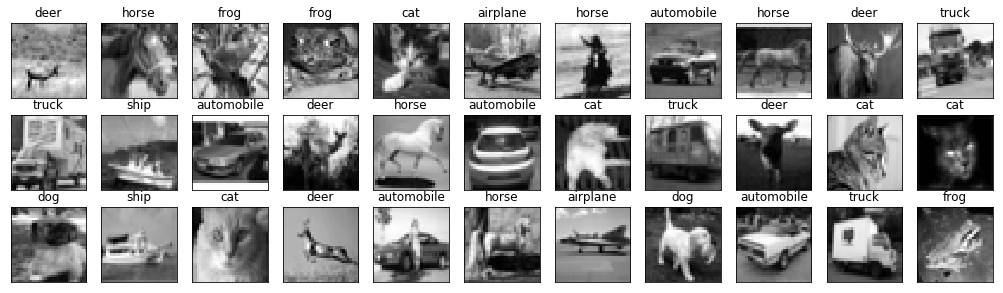

In [7]:
plot_gallery(greyscale_images, labels[image_labels], h, w)

<h1>Data Reduction</h1>
<h2>Linear Dimensionality Reduction - Principal Components Analysis</h2>

In [8]:
from sklearn.decomposition import PCA

n_components = 200
print ("Extracting the top %d components from %d images" % (
    n_components, greyscale_images.shape[0]))

pca = PCA(n_components = n_components)
%time pca.fit(greyscale_images.copy())
eigen_images = pca.components_.reshape((n_components, h, w))

Extracting the top 200 components from 3000 images
Wall time: 431 ms


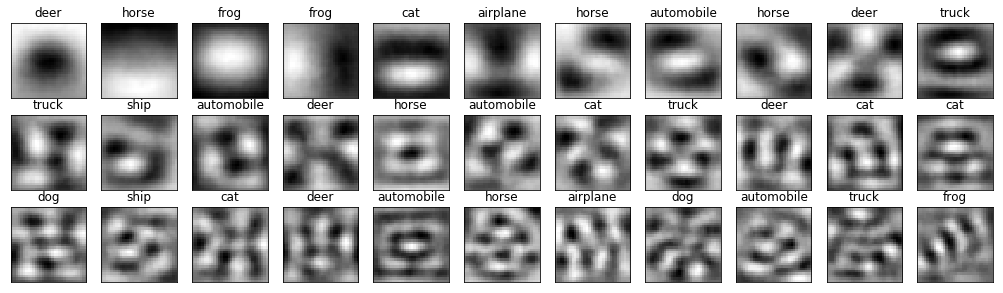

In [9]:
plot_gallery(eigen_images, labels[image_labels] ,h, w)

<h2>Explained Variance</h2>

In [10]:
import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='tete9000', api_key='936qqajHBpvuiyFBHpZL')
from plotly.graph_objs import *
    
explained_var = pca.explained_variance_ratio_*100
cum_var_exp = np.cumsum(explained_var)
    
py.iplot({
     "data": [Bar(y=explained_var, name='individual explained variance'),
             Scatter(y=cum_var_exp, name='cumulative explained variance')
         ],
      "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
})

<p>The number of components specified for the PCA is 200 out of the original 32x32 = 1024 of the image data. Those 200 describe 96.5% of the variance in the image data as seen in the figure above. I conclude that 200 dimensions are a good enough representation of the images.</p>

In [11]:
# Function to project the original images onto the 200 principle components
# It returns the transformed image and the reconstructed image from those components

def reconstruct_image(pca_object, image):
    low_rep = pca_object.transform(image)
    rec_image = pca_object.inverse_transform(low_rep)
    return low_rep, rec_image

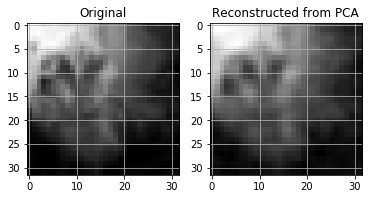

In [12]:
# Example image reconstructed from RPCA components

sample_image_idx = 999    
sample_image = greyscale_images[sample_image_idx]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,sample_image.reshape(1, -1))

plt.subplot(1,2,1)
plt.imshow(sample_image.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid()
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from PCA')
plt.grid()

<h2>Non-Linear Dimensionality Reduction - Kernel PCA</h2>

In [13]:
%%time
from sklearn.decomposition import KernelPCA

n_components = 200
print ("Extracting the top %d components from %d images" % (
    n_components, greyscale_images.shape[0]))

kpca = KernelPCA(n_components = n_components, 
                kernel='rbf', 
                fit_inverse_transform = True, gamma=50,
                remove_zero_eig = True)  

kpca.fit(greyscale_images)

Extracting the top 200 components from 3000 images
Wall time: 6.33 s


In [14]:
import pickle

file1 = open('pca_data', 'wb')
file2 = open( 'kpca_data', 'wb' )

pickle.dump(pca, file1)
pickle.dump(kpca, file2)

<h2>PCA Methods Comparisons</h2>
<h3>Qualitative Measure</h3>

In [15]:
# This function displays a 100 images set comparing the original image with its reconstructed versions from randomized and kernel PCAs.

def plot_gallery(images, titles, h, w, n_row = 30, n_col = 3):
    
    plt.figure(figsize = (5 * n_col, 5 * n_row))
    counter = 1
    rpca = pickle.load(open( 'pca_data', 'rb' ))
    kpca = pickle.load(open( 'kpca_data', 'rb' ))
        
    for i in range(n_row):
        reconstructed_image_rpca = rpca.inverse_transform(rpca.transform(greyscale_images[i].reshape(1, -1)))
        reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(greyscale_images[i].reshape(1, -1)))

        plt.subplot(n_row, n_col, counter)
        plt.imshow(greyscale_images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        counter+=1

        plt.subplot(n_row, n_col, counter)
        plt.imshow(reconstructed_image_rpca.reshape((h, w)), cmap=plt.cm.gray)
        plt.title("Linear PCA", size=12)
        counter+=1

        plt.subplot(n_row, n_col, counter)
        plt.imshow(reconstructed_image_kpca.reshape((h, w)), cmap=plt.cm.gray)
        plt.title("Kernel PCA", size=12)
        counter+=1

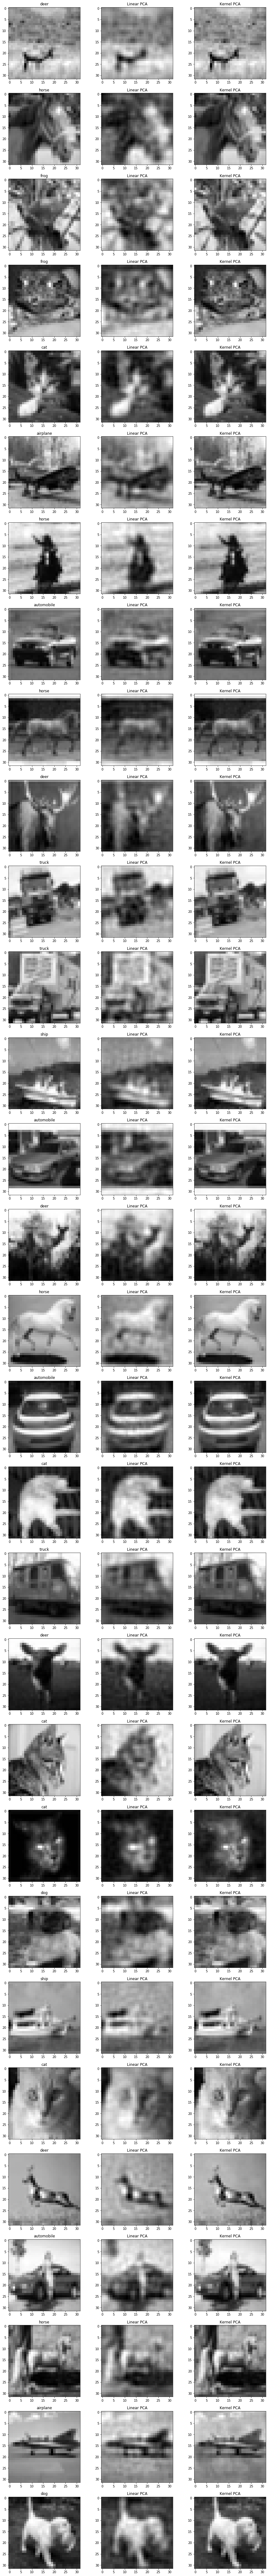

In [16]:
plot_gallery(greyscale_images, labels[image_labels], h, w)

<p>The images above were reconstructed from Linear PCA and Kernel PCA. 200 principle components were used in reconstructing the images. It is quite obvious that Kernel PCA (with a gamma parameter of 50) produced better quality images as can be seen above.</p>

<h3>Quantitative Measure: Neighbor Classifier - Visualization and Score</h3>

In [17]:
# Here, I am going to test the mean accuracy of the classifier when given kernelPCA-processed images and linearPCA-processed images
# I will be testing for a subset of 200 images of my 3000 samples because of processing time of transforming the images

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3, algorithm='brute', p=2)
neigh.fit(greyscale_images, labels[image_labels])

sample_size = 100
image_subset = greyscale_images[0:sample_size]
image_subset_labels = labels[image_labels[0:sample_size]]

pca = pickle.load(open( 'pca_data', 'rb' ))
kpca = pickle.load(open( 'kpca_data', 'rb' ))

kpca_images = np.zeros((image_subset.shape[0],n_features))
pca_images = np.zeros((image_subset.shape[0],n_features))

for i in range(sample_size):
    pca_images[i,:] = (pca.inverse_transform(pca.transform(image_subset[i].reshape(1, -1))))
    kpca_images[i,:] = (kpca.inverse_transform(kpca.transform(image_subset[i].reshape(1, -1))))
    
pca_score = neigh.score(pca_images, image_subset_labels)
kpca_score = neigh.score(kpca_images, image_subset_labels)

print("The score of classification for the Kernel-PCA-processed images is: ", kpca_score)
print("The score of classification for the Linear-PCA-processed images is: ", pca_score)

The score of classification for the Kernel-PCA-processed images is:  0.13
The score of classification for the Linear-PCA-processed images is:  0.39


<p>As can be seen from the results of the scikit-learn KNeighborsClassifier, the images reconstructed from Linear PCA have resulted in significantly better classification performance than corresponding images reconstructed from Kernel-PCA. This can be seen from the mean accuracy score for each PCA type, which shows that the classifier has successfully identified the labels of 52% of the 200 subset of images produced by Linear PCA. The same classifier could only identify 19% of the labels of the images produced by Kernel-PCA. Quantitavely speaking, Linear PCA has produced much better images for the classifier, despite the better quality images (visually) produced by Kernel PCA. The model for the classifier was built from the original image set..</p>

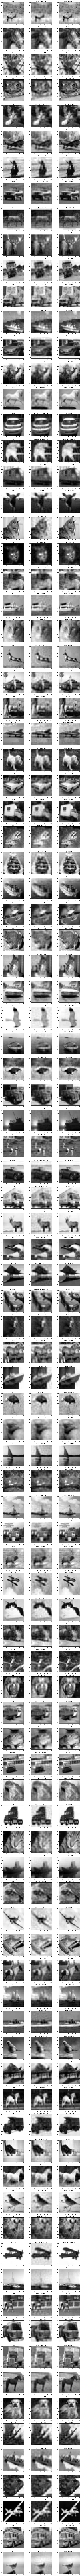

In [18]:
# Visualization of the above classifer
# This function displays a 100 images set comparing the original image with its reconstructed versions from randomized and kernel PCAs.

n_row = 100
n_col = 3
plt.figure(figsize = (5 * n_col, 5 * n_row))
counter = 1
pca_score = 0
kpca_score = 0

for i in range(n_row):
    pca_image = pca_images[i]
    kpca_image = kpca_images[i]
    
    plt.subplot(n_row, n_col, counter)
    plt.imshow(image_subset[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(image_subset_labels[i], size=12)
    counter+=1

    title = neigh.predict(pca_image.reshape((1,-1)))[0]
    plt.subplot(n_row, n_col, counter)
    plt.imshow(pca_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(title + " - Linear PCA", size=12)
    counter+=1
    if (title == image_subset_labels[i]):
        pca_score += 1

    title = neigh.predict(kpca_image.reshape((1,-1)))[0]
    plt.subplot(n_row, n_col, counter)
    plt.imshow(kpca_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(title + " - Kernel PCA", size=12)
    counter+=1
    if (title == image_subset_labels[i]):
        kpca_score += 1

In [19]:
# Manual score calculation - Gives same result as the KNeighborsClassifier score function
print("The mean score for the neighbor classifer using Kernel-PCA-Processed images was calculated to be", kpca_score/n_row)
print("The mean score for the neighbor classifer using PCA-Processed images was calculated to be", pca_score/n_row)

The mean score for the neighbor classifer using Kernel-PCA-Processed images was calculated to be 0.13
The mean score for the neighbor classifer using PCA-Processed images was calculated to be 0.39


<p>The above classifier is being visualized in the figure above for a subset of a 100 image (due to memory and computational limits). The score is also being computed manually for each image instance. The overall score yielded is equal to the score computed by the KNeighborsClassifier score method, as expected.</p>

<h2>Feature Extraction: DAISY</h2>

In [20]:
from skimage.feature import daisy

def apply_daisy(row, shape):
    feat = daisy(row.reshape(shape), step=8, radius=3, rings=3, histograms=5, orientations=8, visualize=False)
    return feat.reshape((-1))

%time daisy_features = np.apply_along_axis(apply_daisy, 1, greyscale_images, (h,w))
print(daisy_features.shape)

Wall time: 16.2 s
(3000, 2048)


In [21]:
from sklearn.metrics.pairwise import pairwise_distances
%time dist_matrix = pairwise_distances(daisy_features)

Wall time: 345 ms


<h2>Performance Analysis of DAISY</h2>
<h3>Nearest Neighbor Classifier - Visualization and Score</h3>

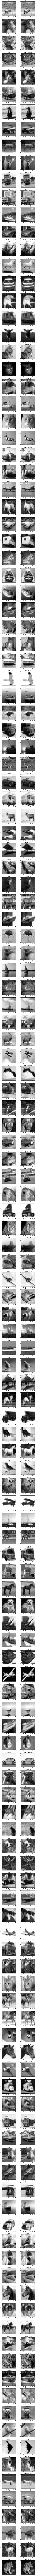

In [32]:
daisy_classifier = KNeighborsClassifier(n_neighbors=3, algorithm='brute', p=2)
daisy_classifier.fit(daisy_features, labels[image_labels])
images_score = daisy_classifier.score(daisy_features, labels[image_labels])

sample_size = 150
image_subset = greyscale_images[0:sample_size]
image_subset_labels = labels[image_labels[0:sample_size]]

# Visualization of the above classifer

n_row = sample_size
n_col = 2
plt.figure(figsize = (5 * n_col, 5 * n_row))
counter = 1
score = 0
for i in range(n_row):
    image = image_subset[i]
    feat = daisy(image.reshape((h, w)), step=8, radius=3, rings=3, histograms=5, orientations=8, visualize=False).reshape((-1))
    
    plt.subplot(n_row, n_col, counter)
    plt.imshow(image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(image_subset_labels[i], size=12)
    counter+=1

    title = daisy_classifier.predict(feat.reshape((1,-1)))[0]
    plt.subplot(n_row, n_col, counter)
    plt.imshow(image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title("Prediction: " + title, size=12)
    counter+=1
    
    if (title == image_subset_labels[i]):
        score += 1

In [33]:
print("The score for the above DAISY classifier for the 150 subset of images  = ", float(score/sample_size)*100, "%")
print("The score for the above DAISY classifier for all images of the dataset  = ", float(images_score)*100, "%")

The score for the above DAISY classifier for the 150 subset of images  =  48.66666666666667 %
The score for the above DAISY classifier for all images of the dataset  =  51.03333333333333 %


<h3>Pairwise Distances - Visualization and Score</h3>

<p>The below widget visualize the closest image to a given image based on the pairwise distances of the daisy features.</p>

In [23]:
import copy
from ipywidgets import fixed, widgets
from skimage.io import imshow

# put it together inside a nice widget
def closest_image(dmat,idx1):
    distances = copy.deepcopy(dmat[idx1,:]) # get all image diatances
    distances[idx1] = np.infty # dont pick the same image!
    idx2 = np.argmin(distances)
    
    plt.figure(figsize=(10,16))
    plt.subplot(1,2,1)
    plt.imshow(greyscale_images[idx1].reshape((h,w)), cmap=plt.cm.gray)
    plt.title("Original Image "+labels[image_labels[idx1]])
    plt.grid()

    plt.subplot(1,2,2)
    imshow(greyscale_images[idx2].reshape((h,w)), cmap=plt.cm.gray)
    plt.title("Closest Image  "+labels[image_labels[idx2]])
    plt.grid()
    
widgets.interact(closest_image,idx1=(0,n_samples-1,1),dmat=fixed(dist_matrix),__manual=True)

interactive(children=(IntSlider(value=1499, description='idx1', max=2999), Output()), _dom_classes=('widget-interact',))

<function __main__.closest_image>

In [37]:
score = 0
for index in range(n_samples):
    
    distances = copy.deepcopy(dist_matrix[index,:])
    distances[index] = np.infty
    index2 = np.argmin(distances)
    
    if labels[image_labels[index]] == labels[image_labels[index2]]:
        score +=1

print("The score of the pairwise distances classifier for all images of the dataset = ", float(score/n_samples)*100, "%")

The score of the pairwise distances classifier for all images of the dataset =  21.4 %


<p>For the above two classifiers based on the nearest neighbor and pairwise distances, the score of the KNeighbors classifier was found to be 51% for all images of the dataset. The pairwise distances classifier yielded a score of 21.4%. The algorithm employed in the KNeighbors classifier is a brute algorithm and it is based on the Euclidean distance (the 'p=2' argument in the object instance).</p>

<h2>Statistical quantities of the different class features</h2>
<h3>PCA of the DAISY features</h3>
<p>2048 features were extracted by using DAISY on the 3000 subset of shuffled image data. Now, I am performing PCA on the features to try and capture most variance in the data using the least number of features. I have decided to use 250 components as they explain close to 85% of the variance.</p>

In [43]:
n_components = 250
print ("Extracting the top %d components from %d daisy features" % (
    n_components, daisy_features.shape[1]))

pca = PCA(n_components = n_components)
reduced_daisy_features = pca.fit(daisy_features).transform(daisy_features)
eigen_features = pca.components_

Extracting the top 250 components from 2048 daisy features


<h3>Explained Variance of the daisy features</h3>
<p>Here I use the 250 components of the PCA analysis to calculate the explained variance of the extracted features.</p>

In [45]:
explained_var = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(explained_var)
    
py.iplot({
     "data": [Bar(y=explained_var, name='individual explained variance'),
             Scatter(y=cum_var_exp, name='cumulative explained variance')
         ],
      "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
})  

<h3>Heatmaps of the correlations of the reduced daisy features</h3>

<p>Here I stack the numpy reduced features array with the image labels column. Then, I convert it to a panda dataframe for later processing. The 250 new features have integers from 0 to 250 as column headers. I cast them into strings.</p>

In [51]:
import pandas as pd
import seaborn as sns

data_array = np.hstack((reduced_daisy_features, image_labels[0:n_samples].reshape((n_samples, 1))))
data_frame = pd.DataFrame(data_array)
data_frame.columns = data_frame.columns.astype(str)

<p>Here, the last column, which is the image labels column (in integer values), is being replaced by its mapped values into the labels vector, so its values are string descriptions now. 0 for 'Airplane', 1 for 'Automobile'...etc..</p>

In [52]:
data_frame['250'] = (data_frame['250']).astype(int)
data_frame['250'] = labels[image_labels]

In [53]:
# This function returns the first 100 row entries of the newly constructed dataframe for a given class

def sub_df(data_frame, label_name):
    df = data_frame[data_frame['250'] == label_name]
    df = df[0:100]
    return df

In [54]:
# This function maps the same feature (only one) of the different classes (all 10 of them) into one dataframe
# This is done to correlate the resulting dataframes in seaborn heatmaps

def create_df(data_frame, feature):
    graph_data_frame = pd.DataFrame(columns = labels)
    for label in labels:
        graph_data_frame[label] = sub_df(data_frame, label)[feature].reset_index(drop=True)
        
    return graph_data_frame

In [133]:
# This function plots correlation heatmaps of the same feature for the different classes
# It shows the degree of correlation of the feature between the classes (frog, dog, horse,...etc)
# The feature being correlated has its header name (an integer value) as the title of the heatmap
# All 250 reduced features are plotted by the widget

def plot_heatmaps_widget(i, data_frame):
    n_row=1
    n_col=2
    plt.figure(figsize = (8 * n_col, 7 * n_row))
    cmap = sns.set(style="whitegrid")
    
    k = create_df(data_frame, data_frame.columns[i])
    plt.subplot(n_row, n_col, 1)
    sns.heatmap(k.corr(), cmap=cmap, annot=True, annot_kws={"size": 8})
    plt.title(data_frame.columns[i], size=12)
    
    k = create_df(data_frame, data_frame.columns[i+1])
    plt.subplot(n_row, n_col, 2)
    sns.heatmap(k.corr(), cmap=cmap, annot=True, annot_kws={"size": 8})
    plt.title(data_frame.columns[i+1], size=12)
    
widgets.interact(plot_heatmaps_widget,i=(0,250-1,2),data_frame=fixed(data_frame),__manual=True)

interactive(children=(IntSlider(value=124, description='i', max=249, step=2), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_heatmaps_widget>

<p>It is clear that the 60 top features visualized above are not near being highly correlated. I could not locate a correlation value between any of the classes in any of the feature heatmaps that is higher than 0.32. I conclude that the method is OKAY performance-wise. There are many correlations with values in the range of 0 - 0.32 in the feature heatmaps. Consequently, classification performance will not be accurate enough for the prediciton task, as was shown above.</p>

<p>As an example, the class 'ship' and class 'cat' has a correlation of 0.31 for the 32th dasiy feature, 'bird' and 'frog' has a correlation of 0.25 for the 42th daisy feature, and so on. </p>